In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Zmniejszenie wymiarowości datasetu, odrzucenie danych, które nie będą poddawane analizie

In [73]:
columns_to_drop = ['assigned_room_type', 'company', 'reserved_room_type', 'deposit_type','previous_bookings_not_canceled','previous_cancellations','agent','country', 'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list', 'deposit_type', 'reservation_status_date','booking_changes']
hotel_df=hotel_df.drop(columns_to_drop, axis=1)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_year          119390 non-null  int64  
 4   arrival_date_month         119390 non-null  object 
 5   arrival_date_week_number   119390 non-null  int64  
 6   arrival_date_day_of_month  119390 non-null  int64  
 7   stays_in_weekend_nights    119390 non-null  int64  
 8   stays_in_week_nights       119390 non-null  int64  
 9   adults                     119390 non-null  int64  
 10  children                   119386 non-null  float64
 11  babies                     119390 non-null  int64  
 12  meal                       119390 non-null  object 
 13  market_segment             11

Liczba rezerwacji według typu hotelu

Text(0, 0.5, 'Count')

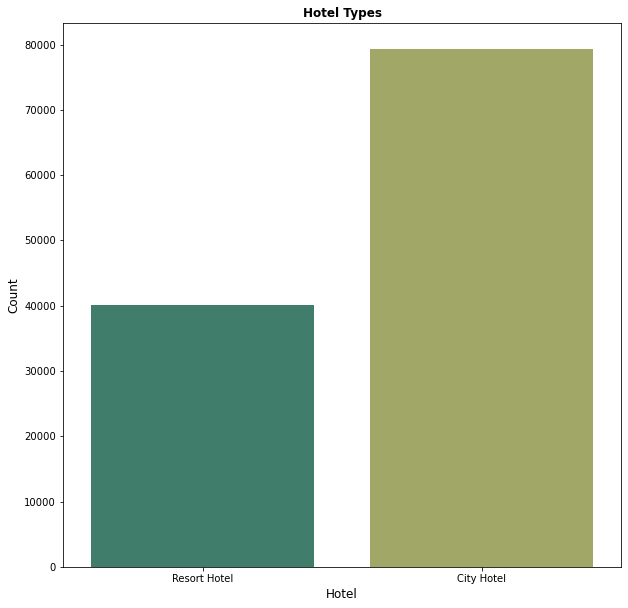

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotel_df, palette='gist_earth')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

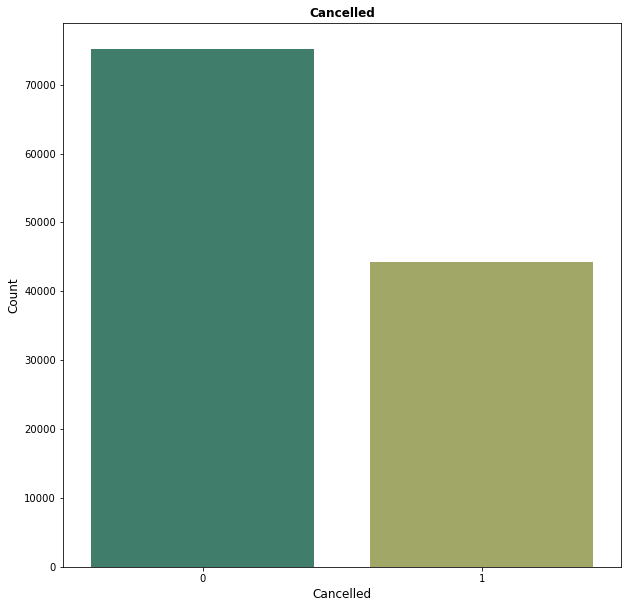

In [75]:
hotel_df['is_canceled'].unique()
plt.figure(figsize=(10,10))
sns.countplot(x='is_canceled', data = hotel_df, palette='gist_earth')
plt.title('Cancelled', weight='bold')
plt.xlabel('Cancelled', fontsize=12)
plt.ylabel('Count', fontsize=12)

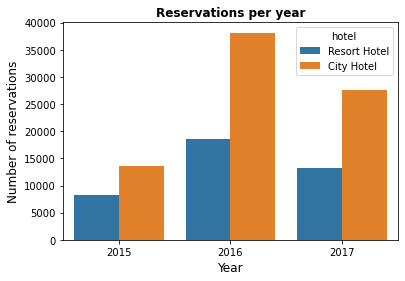

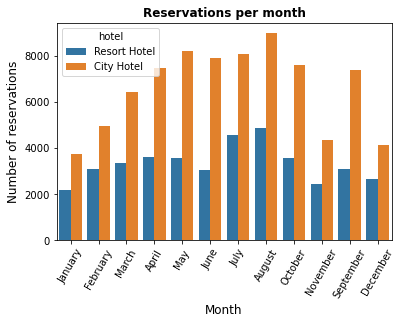

In [81]:
sns.countplot(data=hotel_df,
             x='arrival_date_year', hue='hotel')
plt.title('Reservations per year', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of reservations', fontsize=12)
plt.show()

sns.countplot(data=hotel_df,
              x='arrival_date_month', hue='hotel',
              order=['January', 'February', 'March', 'April', 'May',
                     'June','July','August','September','October', 'November', 'December'])
plt.title('Reservations per month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of reservations', fontsize=12)
plt.xticks(rotation=60)
plt.show()

# sns.countplot(data=hotel_df,
#               x='adr', hue='hotel')
# plt.title('ADR', weight='bold')
# plt.xlabel('ADR', fontsize=12)
# plt.ylabel('Number of reservations', fontsize=12)
# plt.show()

Text(0, 0.5, 'Count')

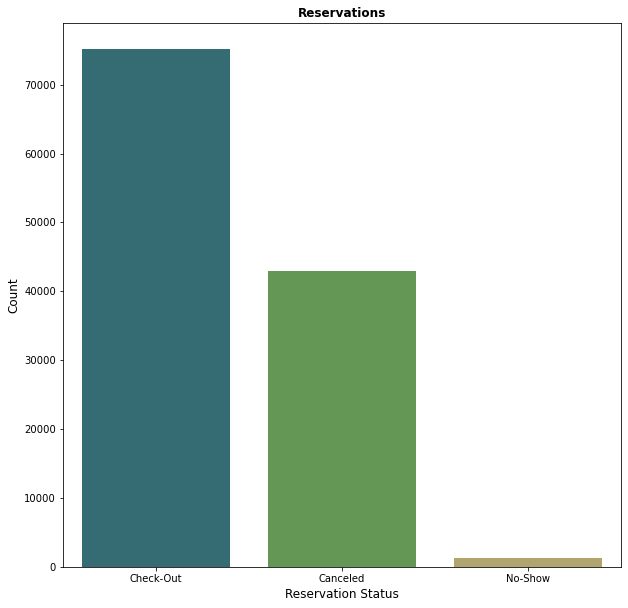

In [77]:
plt.figure(figsize=(10,10))
sns.countplot(x='reservation_status', data = hotel_df, palette='gist_earth')
plt.title('Reservations', weight='bold')
plt.xlabel('Reservation Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

Podstawowe statystyki opisowe danych liczbowych

In [78]:
hotel_df[['adr', 'adults', 'stays_in_week_nights', 'stays_in_weekend_nights', 'lead_time']].describe()

,adr,adults,stays_in_week_nights,stays_in_weekend_nights,lead_time
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,101.831122,1.856403,2.500302,0.927599,104.011416
std,50.535790,0.579261,1.908286,0.998613,106.863097
min,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,69.290000,2.000000,1.000000,0.000000,18.000000
50%,94.575000,2.000000,2.000000,1.000000,69.000000
75%,126.000000,2.000000,3.000000,2.000000,160.000000
max,5400.000000,55.000000,50.000000,19.000000,737.000000


In [80]:
hotel_df['company'].unique()



array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
hotel_df['assigned_room_type'].unique()